기본 세팅

In [ ]:
# 한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 런타임 다시 시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 글꼴 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 1. 데이터 불러오기



*   실습을 위한 데이터 보관장소 : https://github.com/imkwony/241125practice

*   파일이름 : 서울년도별기온.csv



In [1]:
# 파일 다운로드했을 경우 업로드 방법
'''
from google.colab import files
uploaded = files.upload()
'''

# 데이터 가져오기
!git clone https://github.com/imkwony/241125practice

Cloning into '241125practice'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), 4.76 KiB | 4.76 MiB/s, done.


In [3]:
cd 241125practice

/content/241125practice


In [4]:
ls

 서울년도별기온.csv  'Earth Temperature.csv'   penguins_size.csv


In [5]:
import pandas as pd

# 파일 읽기 (인코딩에 따라 변경 가능)
df = pd.read_csv('서울년도별기온.csv', encoding='cp949')

In [6]:
df

,년,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,\t\t\t1907,108.0,NaN,NaN,NaN
1,\t\t\t1908,108.0,10.4,5.8,15.7
2,\t\t\t1909,108.0,10.6,5.8,16.0
3,\t\t\t1910,108.0,10.3,5.7,15.9
4,\t\t\t1911,108.0,10.6,6.0,15.9
...,...,...,...,...,...
114,\t\t\t2021,108.0,13.7,9.6,18.5
115,\t\t\t2022,108.0,13.2,9.2,18.0
116,\t\t\t2023,108.0,14.1,10.0,18.7
117,\t\t\t2024,108.0,NaN,NaN,NaN


## 2. 데이터 전처리

In [7]:
# 날짜 컬럼에서 "\t" 문자 제거
df['년'] = df['년'].str.strip('\t')

In [8]:
df

,년,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1907,108.0,NaN,NaN,NaN
1,1908,108.0,10.4,5.8,15.7
2,1909,108.0,10.6,5.8,16.0
3,1910,108.0,10.3,5.7,15.9
4,1911,108.0,10.6,6.0,15.9
...,...,...,...,...,...
114,2021,108.0,13.7,9.6,18.5
115,2022,108.0,13.2,9.2,18.0
116,2023,108.0,14.1,10.0,18.7
117,2024,108.0,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년          119 non-null    object 
 1   지점         118 non-null    float64
 2   평균기온(℃)    112 non-null    float64
 3   평균최저기온(℃)  112 non-null    float64
 4   평균최고기온(℃)  112 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [10]:
# 결측치 제거
df = df.dropna(subset=['년', '평균기온(℃)', '평균최저기온(℃)', '평균최고기온(℃)'])

In [11]:
# 년 형식 변환
df['년'] = df['년'].astype(int)

<ipython-input-11-afdfd773a03a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['년'] = df['년'].astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 1 to 116
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년          112 non-null    int64  
 1   지점         112 non-null    float64
 2   평균기온(℃)    112 non-null    float64
 3   평균최저기온(℃)  112 non-null    float64
 4   평균최고기온(℃)  112 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.2 KB


In [13]:
df

,년,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
1,1908,108.0,10.4,5.8,15.7
2,1909,108.0,10.6,5.8,16.0
3,1910,108.0,10.3,5.7,15.9
4,1911,108.0,10.6,6.0,15.9
5,1912,108.0,10.1,5.1,15.6
...,...,...,...,...,...
112,2019,108.0,13.5,9.3,18.5
113,2020,108.0,13.2,9.4,17.9
114,2021,108.0,13.7,9.6,18.5
115,2022,108.0,13.2,9.2,18.0


## 3. 시각화

In [14]:
# 연도, 평균기온 데이터 저장하기
year = df['년']
temp = df['평균기온(℃)']

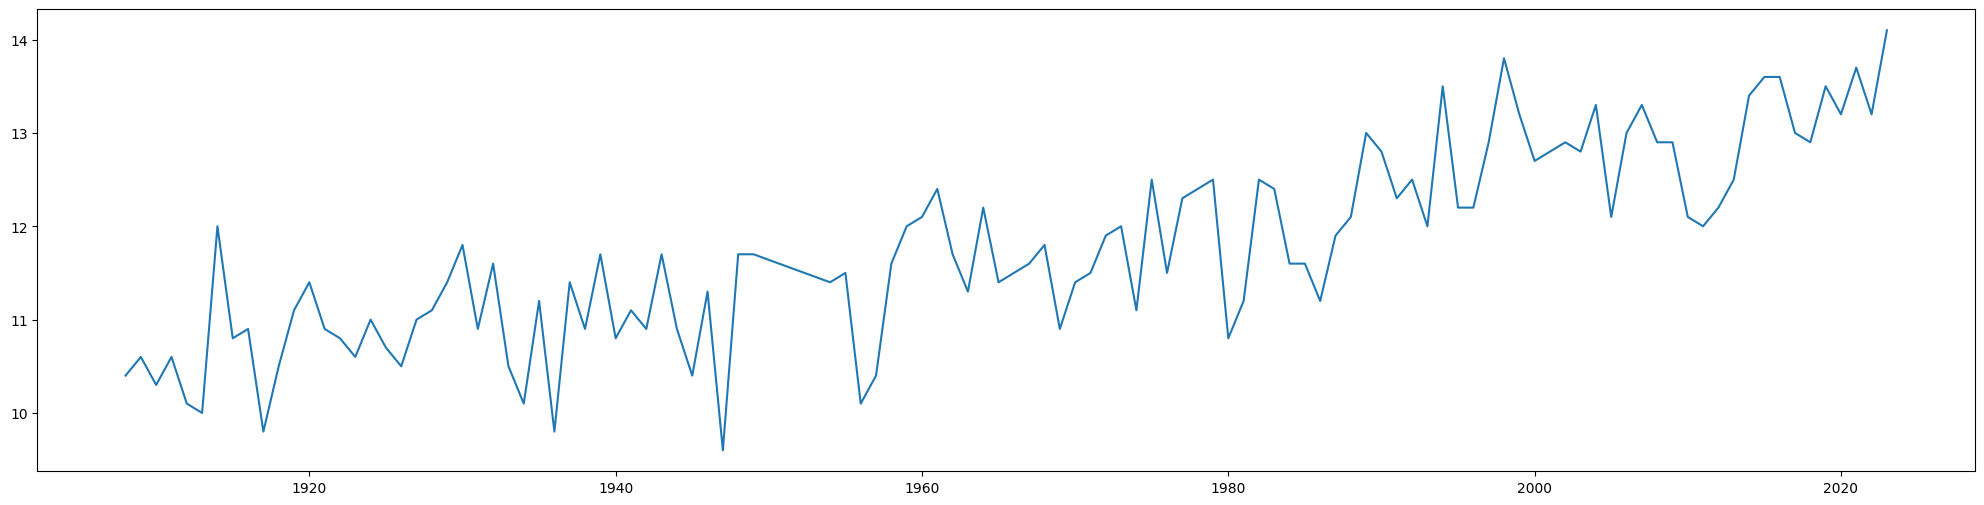

In [15]:
# 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=[25, 6])
plt.plot(year, temp)
plt.show()

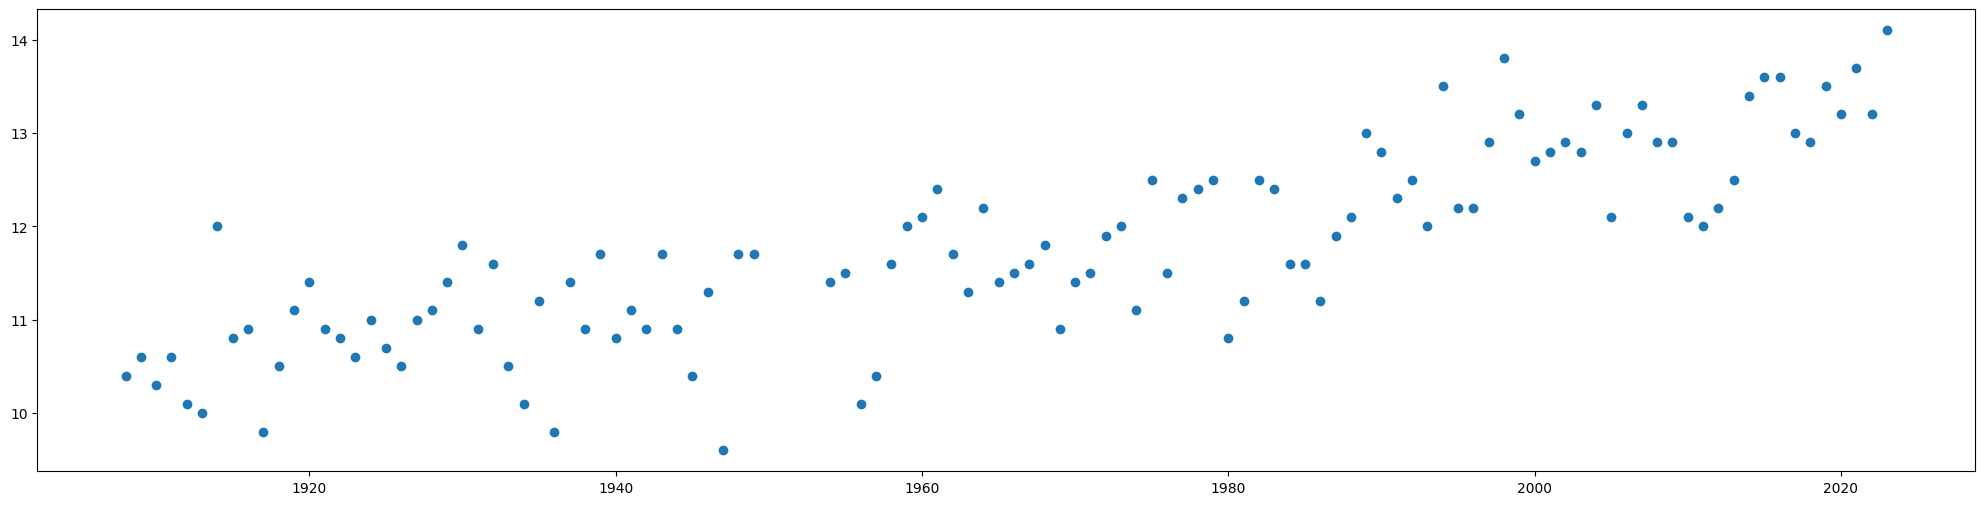

In [16]:
# 산점도(scatter) 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=[25, 6])
plt.scatter(year,temp)
plt.show()

## 4. 선형회귀를 위한 전처리

In [17]:
# 선형 회귀 모델이 원하는 형태로 데이터 모양 맞춰주기(ㅁ행 1열)
import numpy as np
year = np.reshape(year.values,(-1,1)) # ㅁ행 1열 형태로 변환
temp = np.reshape(temp.values,(-1,1)) # ㅁ행 1열 형태로 변환

In [18]:
# 1열 형태 확인하기
year

array([[1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [19

## 5. 선형회귀 모델 학습하기

In [19]:
# sklearn : scikit-learn, 파이썬에서 머신러닝에 가장 많이 사용되는 라이브러리
from sklearn.linear_model import LinearRegression

In [20]:
# 선형 회귀 모델 학습(fit) - 한 줄로 끝
model = LinearRegression().fit(year,temp) # 년, 기온 데이터로 선형 회귀 모델 학습시키기

In [21]:
# 직선의 기울기(coefficient-계수)와 절편(intercept) 확인
model.coef_, model.intercept_

(array([[0.02499536]]), array([-37.38283765]))

> 이를 통해서 해볼 수 있는 것은?

결국 선형회귀라는 것은  y = 기울기 * x + 절편 이니깐

In [22]:
LR1 = np.arange(1908,2021).reshape(-1,1)
pred1 = model.predict(LR1) # 모델로 예측하기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


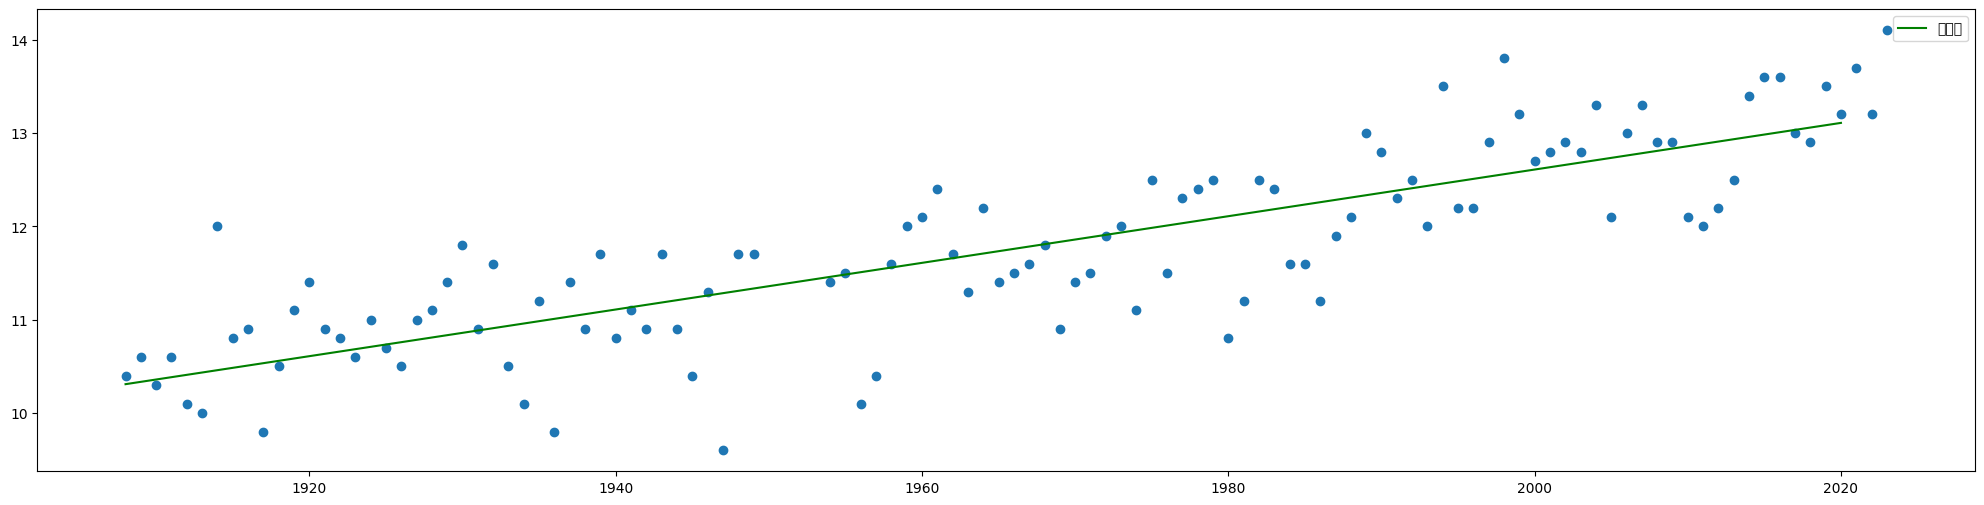

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=[25, 6])
plt.scatter(year,temp)

plt.plot(LR1, pred1, 'g', label = '예측선')
plt.legend()
plt.show()

In [24]:
# 선형회귀에 근거한 미래 기온 예측
y_pred = int(input('예측하고 싶은 연도를 입력해주세요 : '))

pred = model.coef_[0] * y_pred + model.intercept_
print(pred)
print(f'{y_pred}년도의 예상 평균 기온은 {pred[0]:.2f}도 입니다.')

예측하고 싶은 연도를 입력해주세요 : 2050
[13.85764577]
2050년도의 예상 평균 기온은 13.86도 입니다.


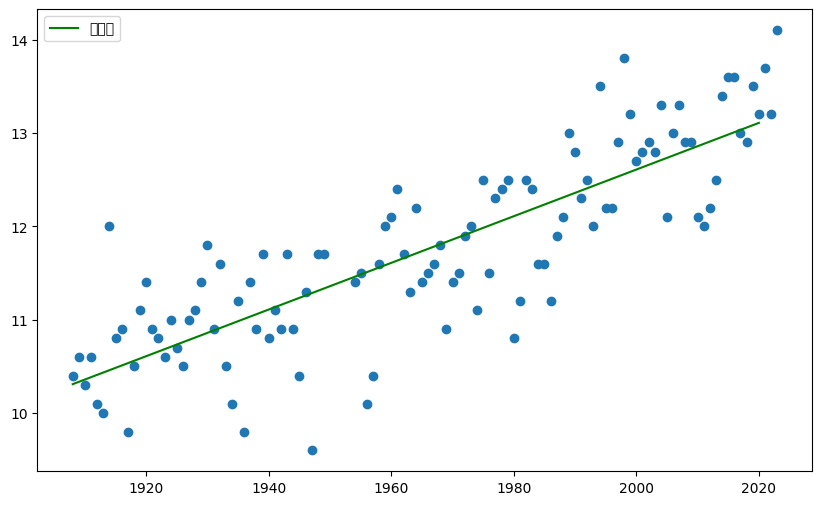

In [25]:
#압축해서 보기
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 6])
plt.scatter(year,temp)

plt.plot(LR1, pred1, 'g', label = '예측선')
plt.legend()
plt.show()

## 두개로 나눠서 진행해보기

1970년 이전과 1970년 이후로 나눠서 진행해보도록 하겠습니다.

In [26]:
# 1908년부터 1970년까지의 데이터로 학습하기
model2 = LinearRegression().fit(year[:-50], temp[:-50]) # 데이터로 학습하기

In [27]:
# 1971년부터 2022년까지의 데이터로 학습하기
model3 = LinearRegression().fit(year[-50:], temp[-50:]) # 데이터로 학습하기

In [28]:
# model2 : 1908년부터 1970년까지의 데이터로 학습한 직선 모델
LR2 = np.arange(1908,1970).reshape(-1,1)
pred2 = model2.predict(LR2) # 모델로 예측하기

In [29]:
# model3 : 1971년부터 2022년까지의 데이터로 학습한 직선 모델
LR3 = np.arange(1971,2022).reshape(-1,1)
pred3 = model3.predict(LR3)

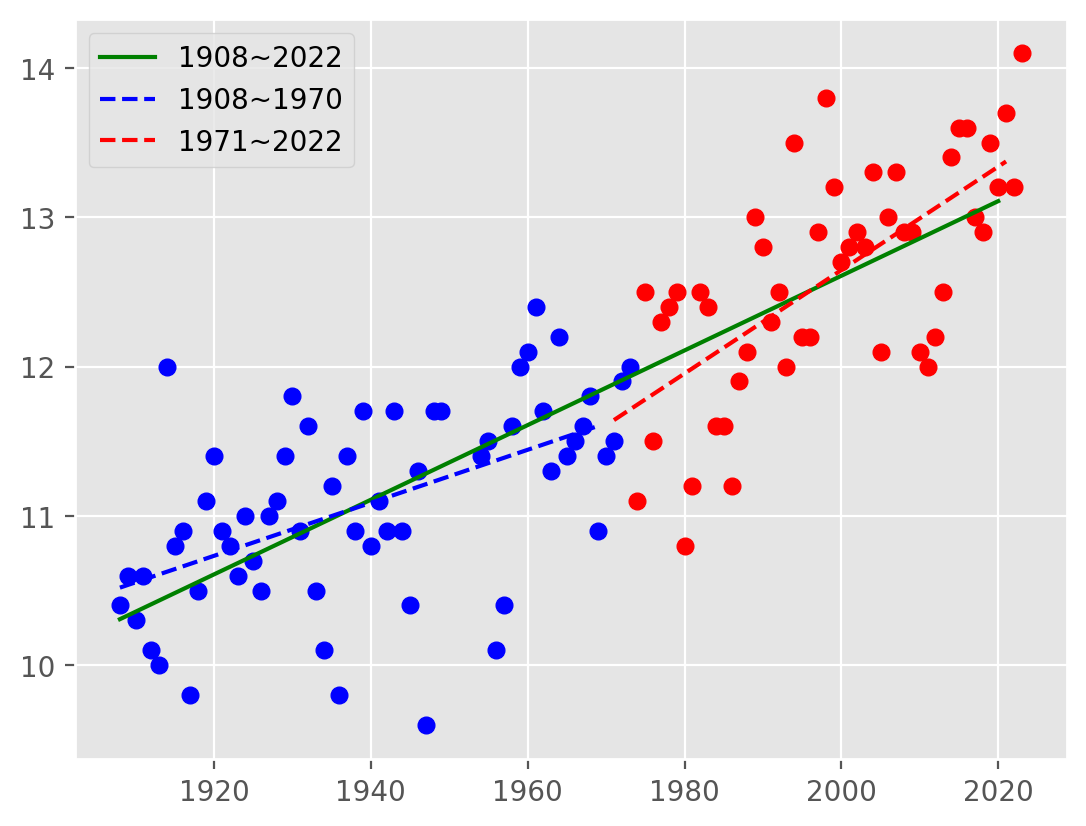

In [30]:
import matplotlib.pyplot as plt
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.scatter(year[:-50], temp[:-50], color = 'b')
plt.scatter(year[-50:], temp[-50:], color = 'r')
plt.plot(LR1, pred1, 'g', label = '1908~2022')
plt.plot(LR2, pred2, 'b--', label = '1908~1970')
plt.plot(LR3, pred3, 'r--', label = '1971~2022')
plt.legend()
plt.show()

In [31]:
print("model2.coef_ :", model2.coef_)
print("model3.coef_ :", model3.coef_)

model2.coef_ : [[0.01775288]]
model3.coef_ : [[0.03463625]]


In [32]:
print("model.coef_ :", model.coef_)

model.coef_ : [[0.02499536]]
